In [1]:
import os
import config
from tqdm import tqdm
DATA_PATH = config.DATA_PATH
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import natsort
import sklearn.cluster as cluster

In [20]:
padding = 20

image_list = glob(f"/home/VirtualFlaw/Hyun/Data/Flaw/{padding}pixel_padding" + '/**', recursive=True)
print(len(image_list))
image_list = natsort.natsorted(image_list)
#file이 아니면 제거
image_list = [file for file in image_list if os.path.isfile(file)]

for i in range(0, len(image_list)):
    
    img = cv2.imread(image_list[i])
    #1채널로 변경
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_x = img.shape[0]
    img_y = img.shape[1]

    img_center = img[padding:img_x-padding, padding:img_y-padding]
    #테두리의 평균과 표준편차를 구함
    #(이미지 전체의 평균 * 이미지 전체의 픽셀 수 - 테두리의 평균 * 테두리의 픽셀 수) / (이미지 전체의 픽셀 수 - 테두리의 픽셀 수)
    
    """img_mean = np.mean(img)
    img_std = np.std(img)
    center_mean = (np.mean(img) * img_x * img_y - np.mean(img_center) * (img_x-padding) * (img_y-padding)) / ((img_x * img_y) - (img_x-padding) * (img_y-padding))
    center_std = (np.std(img) * img_x * img_y - np.std(img_center) * (img_x-padding) * (img_y-padding)) / ((img_x * img_y) - (img_x-padding) * (img_y-padding))
    """
    
    img = cv2.subtract(img, np.mean(img)-0)
    img = cv2.subtract(img, 1)
    
    
    #테두리 0으로 바꾸기
    img[0:padding, 0:img_y] = 0
    img[0:img_x, 0:padding] = 0
    img[img_x-padding:img_x, 0:img_y] = 0
    img[0:img_x, img_y-padding:img_y] = 0
    
    #save
    
    cv2.imwrite(f"/home/VirtualFlaw/Hyun/Data/Flaw/subtract/" + image_list[i].split('/')[-1], img)
    
    
    

244


2
78


(<AxesSubplot: title={'center': 'bst'}>,
 Text(0.5, 1.0, 'bst'))

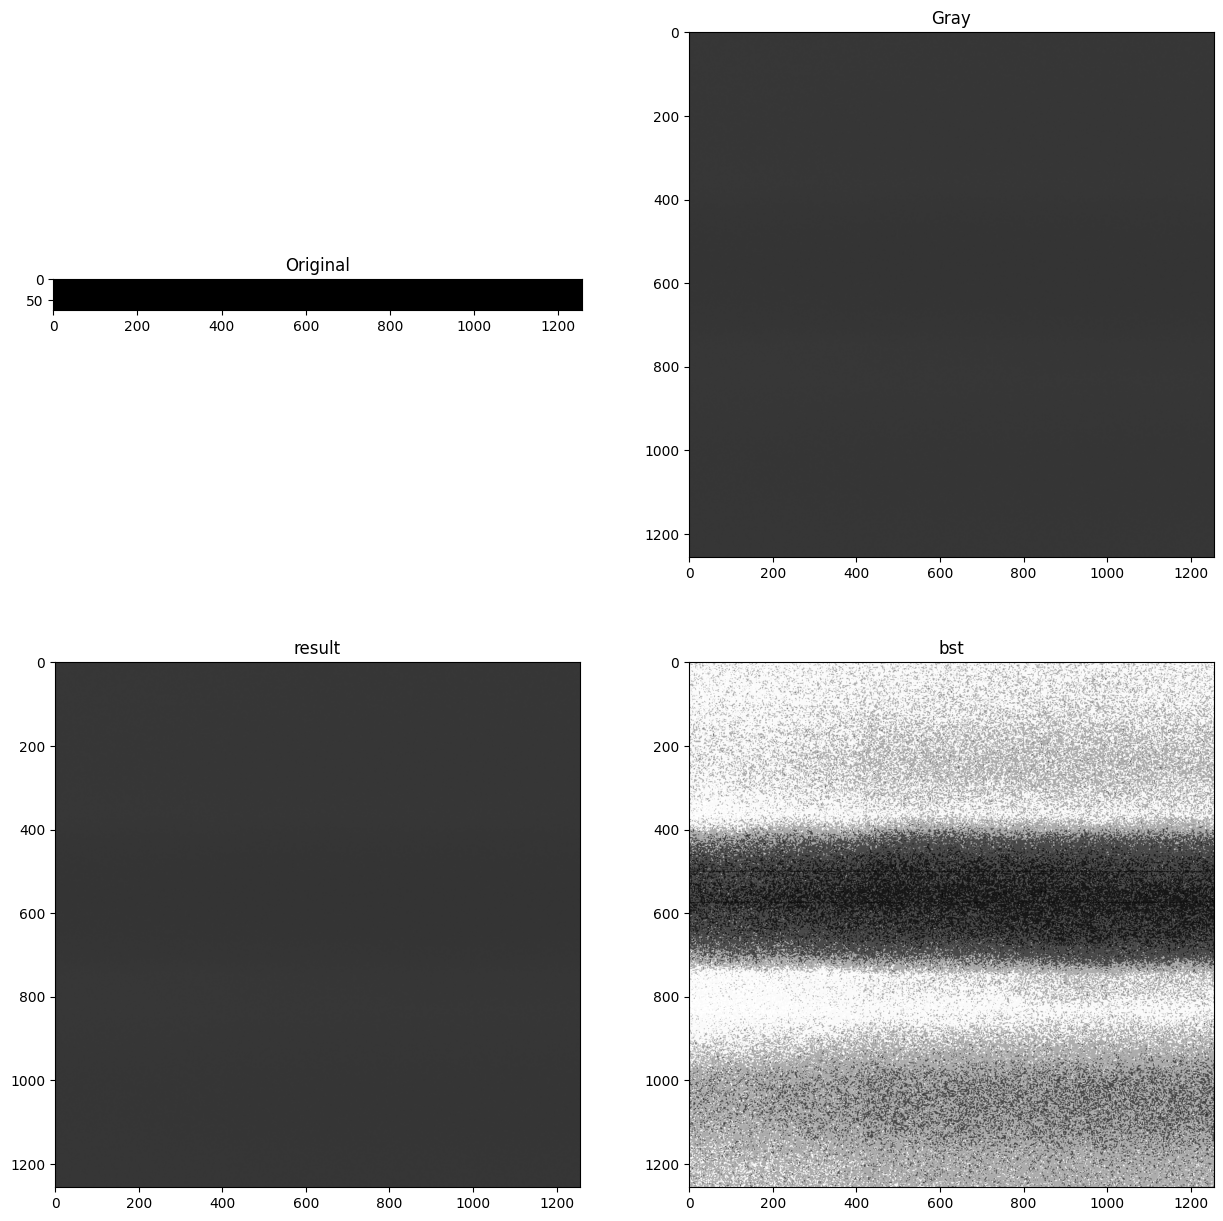